---
# Vinicius Guerra e Ribas
## [Energy Engineer (UnB)](https://www.unb.br/) │ [Data Scientist & Analytics (USP)](https://www5.usp.br/)

### [📧 E-mail](mailto:viniciusgribas@gmail.com?Subject=%5BDados-Geracao%5D%20-%20Contact) │ [🎯 Linkedin](https://www.linkedin.com/in/vinicius-guerra-e-ribas/) │ [😸 GitHub](https://github.com/viniciusgribas)
---

<!-- # [💻Project Notebook](https://github.com/viniciusgribas/Analise_dados_geracao_BR/blob/main/Analise_Geracao_I/Master_Code.ipynb) [🇧🇷]

# [📃 Medium Post](https://viniciusgribas.medium.com/extraindo-insights-do-sistema-de-gera%C3%A7%C3%A3o-de-energia-el%C3%A9trica-brasileiro-utilizando-python-parte-i-70e3eb58c156) [🇧🇷]  -->


This Notebook contains the follow codes

- Data Extraction
- Data Transforms
- Data Load


In [28]:
# Library imports

##  Data Manipulation libraries

import pandas as pd
import numpy as np
import missingno as msno

##  Web Scrapping library

import requests

## Others
from pathlib import Path  # Create a new output file
from datetime import datetime # Show the real time data

def line(x):
    print(x*50)

## Data Extraction


In [29]:
# Extract the files via WebScrapping - API integration

## Assign path 

patch = r"https://dadosabertos.aneel.gov.br/dataset/6d90b77c-c5f5-4d81-bdec-7bc619494bb9/resource/11ec447d-698d-4ab8-977f-b424d5deee6a/download/siga-empreendimentos-geracao.csv"

## Applying a server request

response_API = requests.get(patch)

# Check the file availability, if the value is 200 it was succeeded.

line('*')
print("Status Code")
line('.')
print(response_API.status_code)
if response_API.status_code == 200:
    print("SUCCESS")
else: 
    print("FAILED")

# Look up the requested address information

line('*')
print('HEADERS')
line('.')
print(response_API.headers)

## Note the following information:
# 'Content-Type': 'text/csv'

# The encoding information can be obtained via the .encoding command
line('*')
print('ENCODING')
line('.')
print(response_API.encoding)
line('*')


DataBase_LastModified = response_API.headers['Last-Modified'] 

**************************************************
Status Code
..................................................
200
SUCCESS
**************************************************
HEADERS
..................................................
{'Server': 'nginx/1.18.0 (Ubuntu)', 'Date': 'Sat, 23 Apr 2022 18:37:28 GMT', 'Content-Type': 'text/csv', 'Content-Length': '8039064', 'Connection': 'keep-alive', 'Last-Modified': 'Tue, 19 Apr 2022 20:13:45 GMT', 'Cache-Control': 'public, max-age=0, must-revalidate', 'Expires': 'Sun, 24 Apr 2022 06:37:28 GMT', 'ETag': '"1650399225.0924861-8039064-1145509437"'}
**************************************************
ENCODING
..................................................
ISO-8859-1
**************************************************


In [30]:
# Creating a dataframe
df = pd.read_csv(patch, sep= ";", header=0, decimal= ',',encoding="UTF-16")
df

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,2022-04-19,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,0.0,Não,-20.124799,-43.870202,2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
1,2022-04-19,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,0.0,Não,-20.131873,-43.876935,2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
2,2022-04-19,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1440,0.0,Não,-20.137545,-43.891926,2000-08-31,2030-08-31,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
3,2022-04-19,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000,47500.0,Não,-29.064753,-51.674942,2001-03-15,2036-03-15,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,"Bento Gonçalves - RS, Cotiporã - RS"
4,2022-04-19,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,720,510.0,Não,-27.823775,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,"72 - Uruguai, Inhanduva, Peixe e outros",Floriano Peixoto - RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15464,2022-04-19,Sog001101_2277636,62058,UFV.RS.MS.062058-0.1,MS,UFV,Operação,Solar,Radiação solar,Registro,...,1,0.0,NaN,0.000000,0.000000,NaN,NaN,100% para ENERGISA MATO GROSSO DO SUL - DISTRI...,NaN,Corumbá - MS
15465,2022-04-19,Sog001102_2277638,62059,UFV.RS.MS.062059-9.1,MS,UFV,Operação,Solar,Radiação solar,Registro,...,1,0.0,NaN,0.000000,0.000000,NaN,NaN,100% para ENERGISA MATO GROSSO DO SUL - DISTRI...,NaN,Corumbá - MS
15466,2022-04-19,Sog001103_2277639,62060,UFV.RS.MS.062060-2.1,MS,UFV,Operação,Solar,Radiação solar,Registro,...,1,0.0,NaN,0.000000,0.000000,NaN,NaN,100% para ENERGISA MATO GROSSO DO SUL - DISTRI...,NaN,Corumbá - MS
15467,2022-04-19,Sog001104_2278238,62061,UFV.RS.MS.062061-0.1,MS,UFV,Operação,Solar,Radiação solar,Registro,...,1,0.0,NaN,0.000000,0.000000,NaN,NaN,100% para ENERGISA MATO GROSSO DO SUL - DISTRI...,NaN,Corumbá - MS


## Data Transformation


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15469 entries, 0 to 15468
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DatGeracaoConjuntoDados       15469 non-null  object 
 1   NomEmpreendimento             15469 non-null  object 
 2   IdeNucleoCEG                  15469 non-null  int64  
 3   CodCEG                        15469 non-null  object 
 4   SigUFPrincipal                15469 non-null  object 
 5   SigTipoGeracao                15469 non-null  object 
 6   DscFaseUsina                  15469 non-null  object 
 7   DscOrigemCombustivel          15469 non-null  object 
 8   DscFonteCombustivel           15469 non-null  object 
 9   DscTipoOutorga                15469 non-null  object 
 10  NomFonteCombustivel           15469 non-null  object 
 11  DatEntradaOperacao            13618 non-null  object 
 12  MdaPotenciaOutorgadaKw        15469 non-null  float64
 13  M

In [32]:
#   VARIABLE CLASSIFICATION

##  ##   Column                          Dtype             Variable Type          Decision
## ---  ------                          -----              ----------         │ --------
##  0   DatGeracaoConjuntoDados      │  object   │  CATEGORICAL-DATETIME      │  DROP
##  1   NomEmpreendimento            │  object   │  CATEGORICAL-NOMINAL       │
##  2   IdeNucleoCEG                 │  int64    │  CATEGORICAL-ORDINAL       │  DROP
##  3   CodCEG                       │  object   │  CATEGORICAL-ORDINAL       │  DROP
##  4   SigUFPrincipal               │  object   │  CATEGORICAL-NOMINAL       │
##  5   SigTipoGeracao               │  object   │  CATEGORICAL-NOMINAL       │
##  6   DscFaseUsina                 │  object   │  CATEGORICAL-ORDINAL       │
##  7   DscOrigemCombustivel         │  object   │  CATEGORICAL-NOMINAL       │
##  8   DscFonteCombustivel          │  object   │  CATEGORICAL-NOMINAL       │
##  9   DscTipoOutorga               │  object   │  CATEGORICAL-ORDINAL       │
##  10  NomFonteCombustivel          │  object   │  CATEGORICAL-ORDINAL       │
##  11  DatEntradaOperacao           │  object   │  CATEGORICAL-DATETIME      │
##  12  MdaPotenciaOutorgadaKw       │  float64  │  NUMERICAL-CONTINOUS-RATIO │
##  13  MdaPotenciaFiscalizadaKw     │  int64    │  NUMERICAL-DISCRETE        │
##  14  MdaGarantiaFisicaKw          │  float64  │  NUMERICAL-CONTINOUS-RATIO │
##  15  IdcGeracaoQualificada        │  object   │  CATEGORICAL-BINARY        │
##  16  NumCoordNEmpreendimento      │  float64  │  NUMERICAL-CONTINOUS-INTERVAL*│ 
##  17  NumCoordEEmpreendimento      │  float64  │  NUMERICAL-CONTINOUS-INTERVAL*│
##  18  DatInicioVigencia            │  object   │  CATEGORICAL-DATETIME      │
##  19  DatFimVigencia               │  object   │  CATEGORICAL-DATETIME      │
##  20  DscPropriRegimePariticipacao │  object   │  CATEGORICAL-NOMINAL       │  DROP
##  21  DscSubBacia                  │  object   │  CATEGORICAL-NOMINAL       │  DROP
##  22  DscMuninicpios               │  object   │  CATEGORICAL-NOMINAL       │  DROP

### *Geographical Variables

# Using the .drop() function to delete unwanted columns

df = df.drop(columns=['DatGeracaoConjuntoDados','IdeNucleoCEG','CodCEG','DscPropriRegimePariticipacao','DscSubBacia','DscMuninicpios'] )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15469 entries, 0 to 15468
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NomEmpreendimento         15469 non-null  object 
 1   SigUFPrincipal            15469 non-null  object 
 2   SigTipoGeracao            15469 non-null  object 
 3   DscFaseUsina              15469 non-null  object 
 4   DscOrigemCombustivel      15469 non-null  object 
 5   DscFonteCombustivel       15469 non-null  object 
 6   DscTipoOutorga            15469 non-null  object 
 7   NomFonteCombustivel       15469 non-null  object 
 8   DatEntradaOperacao        13618 non-null  object 
 9   MdaPotenciaOutorgadaKw    15469 non-null  float64
 10  MdaPotenciaFiscalizadaKw  15469 non-null  int64  
 11  MdaGarantiaFisicaKw       15469 non-null  float64
 12  IdcGeracaoQualificada     7187 non-null   object 
 13  NumCoordNEmpreendimento   15469 non-null  float64
 14  NumCoo

NomEmpreendimento               0
SigUFPrincipal                  0
SigTipoGeracao                  0
DscFaseUsina                    0
DscOrigemCombustivel            0
DscFonteCombustivel             0
DscTipoOutorga                  0
NomFonteCombustivel             0
DatEntradaOperacao           1851
MdaPotenciaOutorgadaKw          0
MdaPotenciaFiscalizadaKw        0
MdaGarantiaFisicaKw             0
IdcGeracaoQualificada        8282
NumCoordNEmpreendimento         0
NumCoordEEmpreendimento         0
DatInicioVigencia           11530
DatFimVigencia              11542
dtype: int64


<AxesSubplot:>

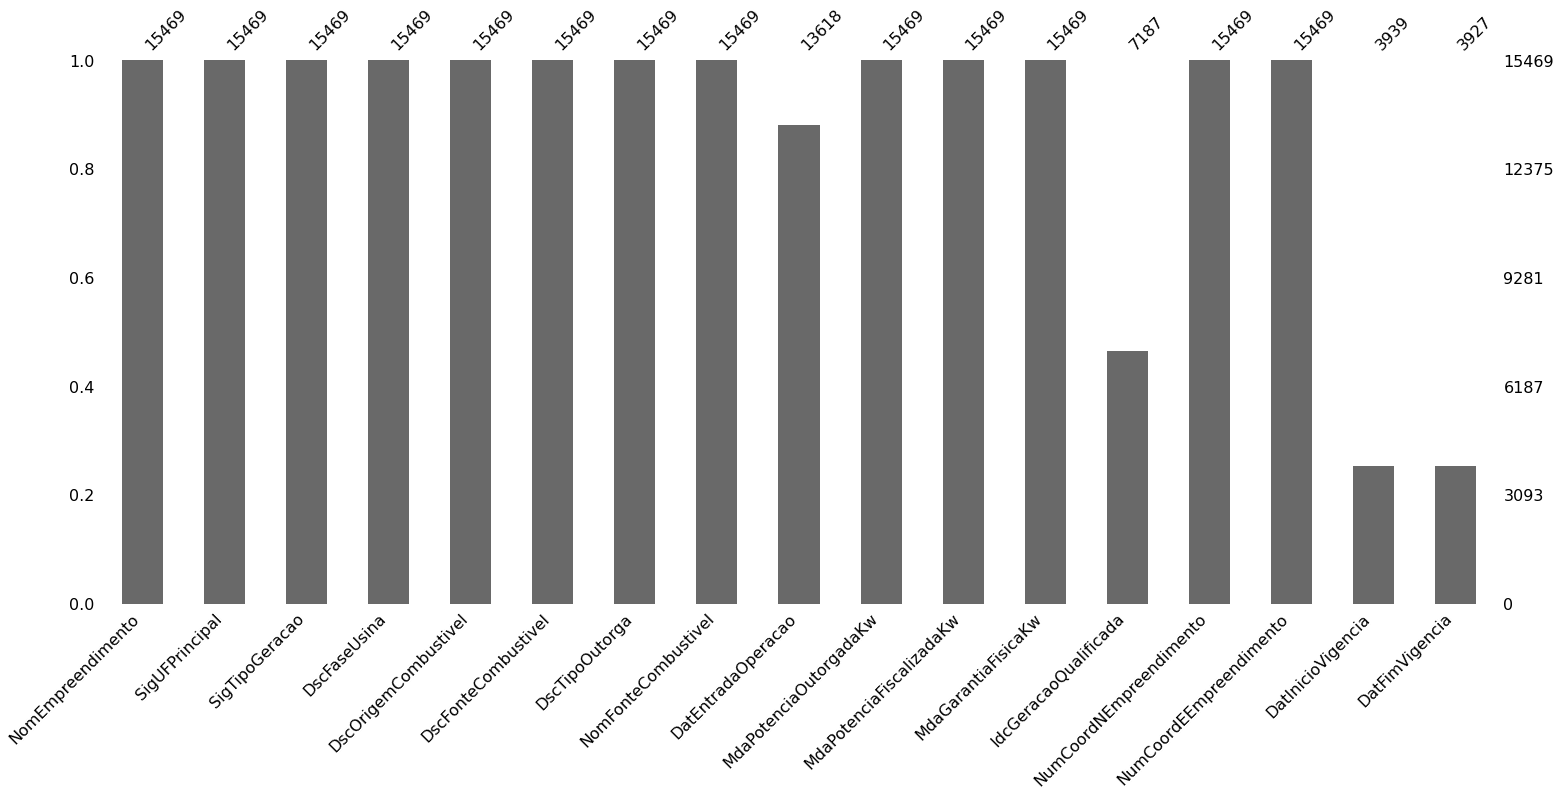

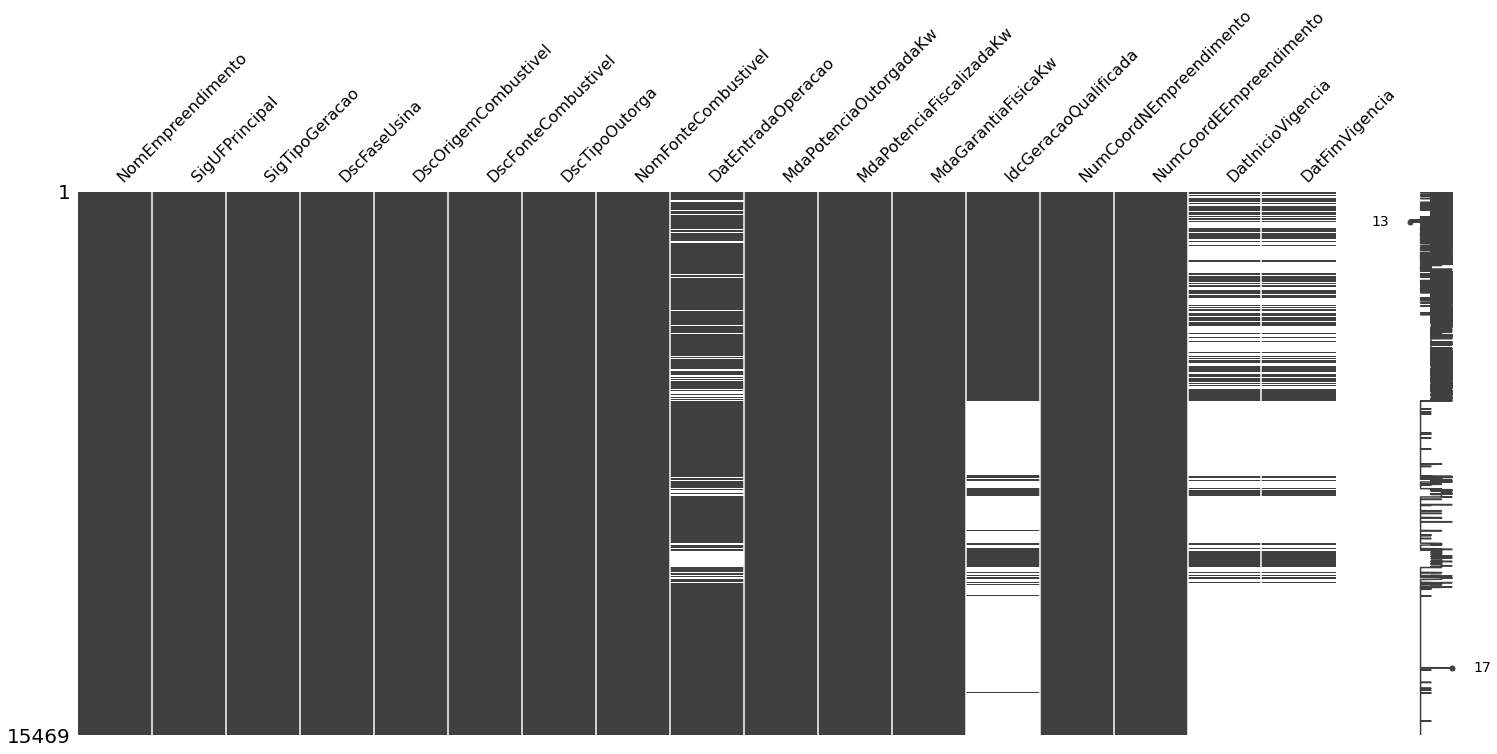

In [34]:
print(df.isnull().sum())
msno.bar(df)
msno.matrix(df)

In [36]:
# For the 'IdGeracaoQualificada' column the 'nan' values was replaced by "Não"
# Given that is a Binary Type Variable

print(df.IdcGeracaoQualificada.unique())
df.IdcGeracaoQualificada.fillna('Não',inplace=True)
print(df.IdcGeracaoQualificada.unique())

['Não' 'Sim']
['Não' 'Sim']


In [37]:
# For the 'DatInicioVigencia' column the 'nan' values was replaced by 0
# Given that is a Date-Time Type Variable

df.DatInicioVigencia.fillna(0,inplace=True)
df.DatInicioVigencia = pd.to_datetime(df.DatInicioVigencia)

In [38]:
# For the 'DatFimVigencia' column the 'nan' values was replaced by 0
# Given that is a Date-Time Type Variable

df.DatFimVigencia.fillna(0,inplace=True)
df.DatFimVigencia = pd.to_datetime(df.DatFimVigencia)

In [39]:
# For the 'DatEntradaOperacao' column the 'nan' values was replaced by 0
# Given that is a Date-Time Type Variable

df.DatEntradaOperacao.fillna(0,inplace=True)
df.DatEntradaOperacao = pd.to_datetime(df.DatEntradaOperacao)

NomEmpreendimento           0
SigUFPrincipal              0
SigTipoGeracao              0
DscFaseUsina                0
DscOrigemCombustivel        0
DscFonteCombustivel         0
DscTipoOutorga              0
NomFonteCombustivel         0
DatEntradaOperacao          0
MdaPotenciaOutorgadaKw      0
MdaPotenciaFiscalizadaKw    0
MdaGarantiaFisicaKw         0
IdcGeracaoQualificada       0
NumCoordNEmpreendimento     0
NumCoordEEmpreendimento     0
DatInicioVigencia           0
DatFimVigencia              0
dtype: int64


<AxesSubplot:>

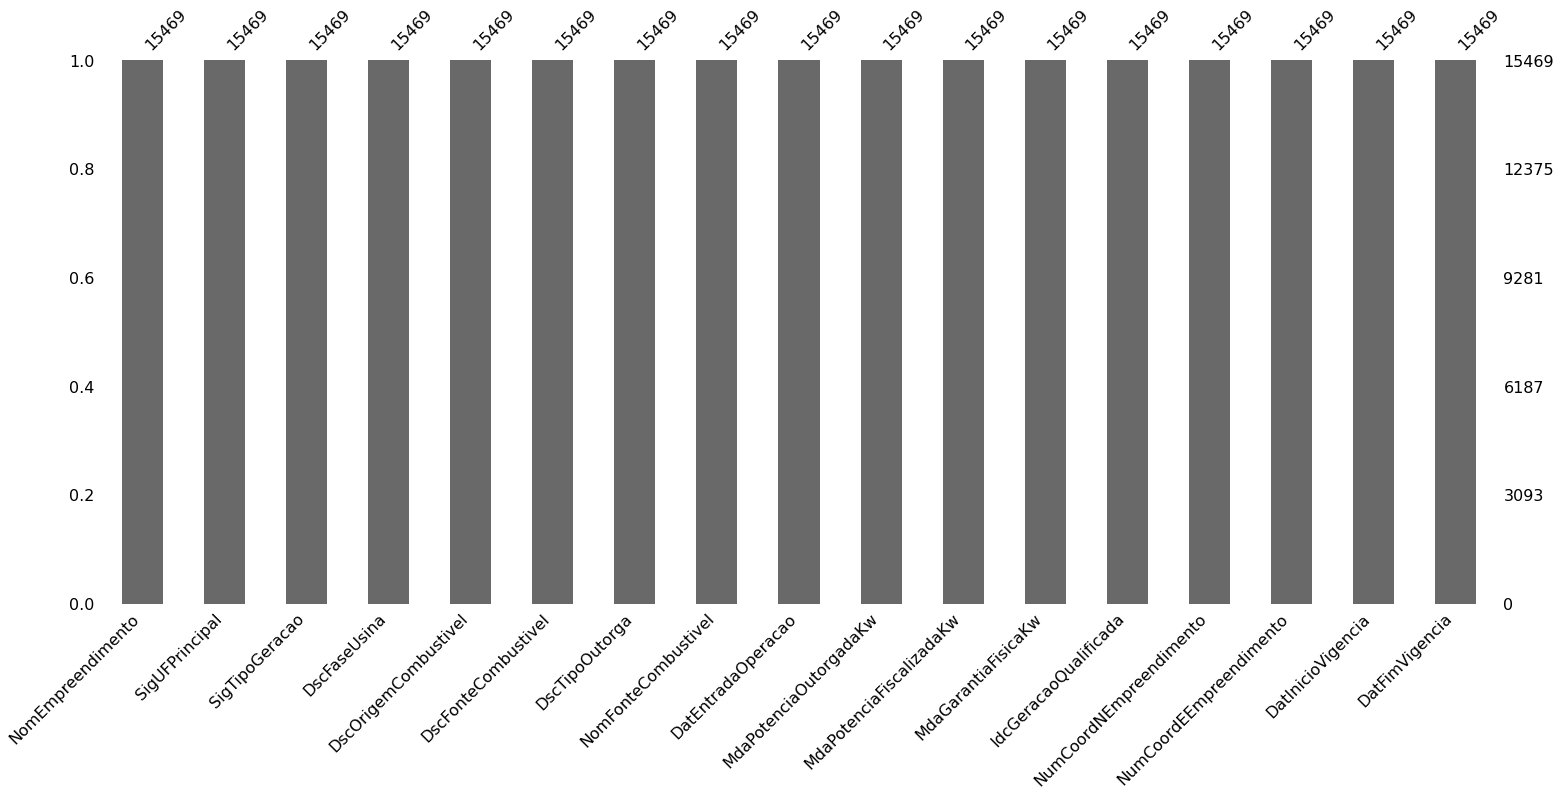

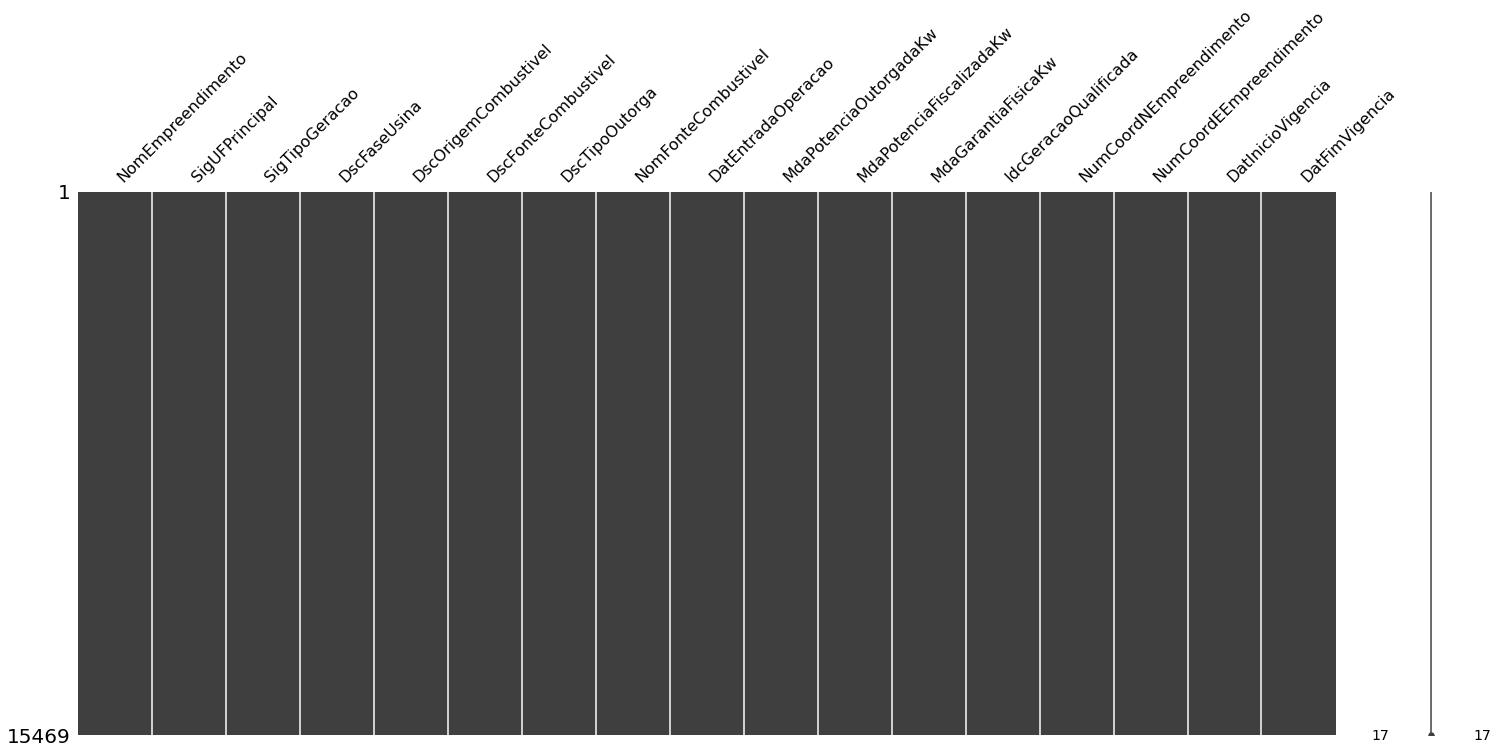

In [40]:
print(df.isnull().sum())
msno.bar(df)
msno.matrix(df)

In [41]:
df.columns
df = df.rename( columns={
"NomEmpreendimento":"Empreendimento",
"SigUFPrincipal":"UF",
"SigTipoGeracao":"TipoGeracao",
"DscFaseUsina":"Fase",
"DscOrigemCombustivel":"OrigemCombustivel",
"DscFonteCombustivel":"FonteCombustivel",
"NomFonteCombustivel":"NomeCombustivel",
"DscTipoOutorga":"Outorga",
"MdaGarantiaFisicaKw":"MdaGarantiaFisicaKW",
"MdaPotenciaFiscalizadaKw":"MdaPotenciaFiscalizadaKW",
"MdaPotenciaOutorgadaKw":"MdaPotenciaOutorgadaKW",
"IdcGeracaoQualificada":"GeracaoQualificada",
"NumCoordEEmpreendimento": "X",
"NumCoordNEmpreendimento": "Y",	
"DscMuninicpios":"Municipio"}
)
df


,Empreendimento,UF,TipoGeracao,Fase,OrigemCombustivel,FonteCombustivel,Outorga,NomeCombustivel,DatEntradaOperacao,MdaPotenciaOutorgadaKW,MdaPotenciaFiscalizadaKW,MdaGarantiaFisicaKW,GeracaoQualificada,Y,X,DatInicioVigencia,DatFimVigencia
0,E,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1970-01-01,1400.00,1400,0.0,Não,-20.124799,-43.870202,2000-07-07,2030-07-07
1,F,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1970-01-01,3972.00,3972,0.0,Não,-20.131873,-43.876935,2000-07-07,2030-07-07
2,G,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1937-01-01,1440.00,1440,0.0,Não,-20.137545,-43.891926,2000-08-31,2030-08-31
3,14 de Julho,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,Potencial hidráulico,2008-12-25,100000.00,100000,47500.0,Não,-29.064753,-51.674942,2001-03-15,2036-03-15
4,Abaúna,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,Potencial hidráulico,2000-10-15,720.00,720,510.0,Não,-27.823775,-52.069997,1970-01-01,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15464,Sog001101_2277636,MS,UFV,Operação,Solar,Radiação solar,Registro,Radiação solar,2021-12-08,1.38,1,0.0,Não,0.000000,0.000000,1970-01-01,1970-01-01
15465,Sog001102_2277638,MS,UFV,Operação,Solar,Radiação solar,Registro,Radiação solar,2021-12-08,1.38,1,0.0,Não,0.000000,0.000000,1970-01-01,1970-01-01
15466,Sog001103_2277639,MS,UFV,Operação,Solar,Radiação solar,Registro,Radiação solar,2021-12-10,1.38,1,0.0,Não,0.000000,0.000000,1970-01-01,1970-01-01
15467,Sog001104_2278238,MS,UFV,Operação,Solar,Radiação solar,Registro,Radiação solar,2021-12-10,1.38,1,0.0,Não,0.000000,0.000000,1970-01-01,1970-01-01


## Data Load


In [44]:
filepath = Path(r'output/CSV/Generation_Data.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  
filepath.parent.mkdir

df['ETL_CreatedDataLoad_At'] = datetime.now().strftime("%Y.%m.%d - %H:%M:%S")
df.ETL_CreatedDataLoad_At = pd.to_datetime(df.ETL_CreatedDataLoad_At)

df['ETL_DataBase_LastModified'] = DataBase_LastModified
df.ETL_DataBase_LastModified = pd.to_datetime(df.ETL_DataBase_LastModified).dt.tz_localize(None)
df.info()

# df.to_csv(filepath, encoding='utf-8', index=False)  

# print('CREATION DATE [',datetime.now().strftime("%Y.%m.%d - %H:%M:%S"), ']\nOUTPUT PATCH [',os.getcwd(),'\\', filepath, '] directory')

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15469 entries, 0 to 15468
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Empreendimento             15469 non-null  object        
 1   UF                         15469 non-null  object        
 2   TipoGeracao                15469 non-null  object        
 3   Fase                       15469 non-null  object        
 4   OrigemCombustivel          15469 non-null  object        
 5   FonteCombustivel           15469 non-null  object        
 6   Outorga                    15469 non-null  object        
 7   NomeCombustivel            15469 non-null  object        
 8   DatEntradaOperacao         15469 non-null  datetime64[ns]
 9   MdaPotenciaOutorgadaKW     15469 non-null  float64       
 10  MdaPotenciaFiscalizadaKW   15469 non-null  int64         
 11  MdaGarantiaFisicaKW        15469 non-null  float64       
 12  Gera

,Empreendimento,UF,TipoGeracao,Fase,OrigemCombustivel,FonteCombustivel,Outorga,NomeCombustivel,DatEntradaOperacao,MdaPotenciaOutorgadaKW,MdaPotenciaFiscalizadaKW,MdaGarantiaFisicaKW,GeracaoQualificada,Y,X,DatInicioVigencia,DatFimVigencia,ETL_CreatedDataLoad_At,ETL_DataBase_LastModified
0,E,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1970-01-01,1400.00,1400,0.0,Não,-20.124799,-43.870202,2000-07-07,2030-07-07,2022-04-23 15:39:29,2022-04-19 20:13:45
1,F,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1970-01-01,3972.00,3972,0.0,Não,-20.131873,-43.876935,2000-07-07,2030-07-07,2022-04-23 15:39:29,2022-04-19 20:13:45
2,G,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1937-01-01,1440.00,1440,0.0,Não,-20.137545,-43.891926,2000-08-31,2030-08-31,2022-04-23 15:39:29,2022-04-19 20:13:45
3,14 de Julho,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,Potencial hidráulico,2008-12-25,100000.00,100000,47500.0,Não,-29.064753,-51.674942,2001-03-15,2036-03-15,2022-04-23 15:39:29,2022-04-19 20:13:45
4,Abaúna,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,Potencial hidráulico,2000-10-15,720.00,720,510.0,Não,-27.823775,-52.069997,1970-01-01,1970-01-01,2022-04-23 15:39:29,2022-04-19 20:13:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15464,Sog001101_2277636,MS,UFV,Operação,Solar,Radiação solar,Registro,Radiação solar,2021-12-08,1.38,1,0.0,Não,0.000000,0.000000,1970-01-01,1970-01-01,2022-04-23 15:39:29,2022-04-19 20:13:45
15465,Sog001102_2277638,MS,UFV,Operação,Solar,Radiação solar,Registro,Radiação solar,2021-12-08,1.38,1,0.0,Não,0.000000,0.000000,1970-01-01,1970-01-01,2022-04-23 15:39:29,2022-04-19 20:13:45
15466,Sog001103_2277639,MS,UFV,Operação,Solar,Radiação solar,Registro,Radiação solar,2021-12-10,1.38,1,0.0,Não,0.000000,0.000000,1970-01-01,1970-01-01,2022-04-23 15:39:29,2022-04-19 20:13:45
15467,Sog001104_2278238,MS,UFV,Operação,Solar,Radiação solar,Registro,Radiação solar,2021-12-10,1.38,1,0.0,Não,0.000000,0.000000,1970-01-01,1970-01-01,2022-04-23 15:39:29,2022-04-19 20:13:45


In [ ]:
# df = pd.read_csv(r"https://raw.githubusercontent.com/viniciusgribas/Analise_dados_geracao_BR/main/Analise_Geracao_II/Notebooks/output/CSV/Generation_Data.csv",encoding='utf-8')
# df